# Fish Species Weight Analysis and Prediction

### By Dhrruv Tokas

## 1. Importing Required Libraries

In [1]:
import pandas as pd # For file operations
import matplotlib.pyplot as plt # For visualization
import numpy as np # For numpy model evaluation
from sklearn.preprocessing import OrdinalEncoder # For handling categorical variables
import statsmodels.api as sm # For model summary

import re # For data wrangling

from sklearn.model_selection import train_test_split # For creating training and testing datasets
from sklearn.linear_model import LinearRegression # For linear regression model
from sklearn.ensemble import RandomForestRegressor # For random forest model
from sklearn import metrics # For metric evaulation

import warnings # To disable warnings
warnings.filterwarnings("ignore")

## 2. Data Wrangling

In [2]:
# Reading dataset

filepath = "C:/Users/dhrru/Downloads/Air Quality/fish_market.csv"
depvar = "Weight"

def file_process(filepath):
    if ".csv" in filepath:
        data = pd.read_csv(filepath, index_col=False, encoding='unicode_escape')
    elif ".xls" in filepath:
        data = pd.read_excel(filepath, index_col=False)
    elif ".tsv" in filepath:
        data = pd.read_table(filepath, index_col=False)
    elif ".json" in filepath:
        data = pd.read_json(filepath)
    else:
        data = pd.read_csv(filepath, index_col=False, sep=" ")
    return data
    
data = file_process(filepath)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [3]:
# Displaying the dataframe
data

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Displaying first 5 rows
data.head(5)

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Displaying last 5 rows
data.tail(5)

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
# Displaying dataset columns
data.columns

Index(['ï»¿Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
# Displaying data shape (rows x columns)
data.shape

(159, 7)

In [8]:
# Data description
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
# Datatype information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ï»¿Species  159 non-null    object 
 1   Weight      159 non-null    float64
 2   Length1     159 non-null    float64
 3   Length2     159 non-null    float64
 4   Length3     159 non-null    float64
 5   Height      159 non-null    float64
 6   Width       159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
print("Data Shape Before", data.shape)
data.drop_duplicates(keep=False, inplace=True)
print("Data Shape After", data.shape)

Data Shape Before (159, 7)
Data Shape After (159, 7)


In [11]:
# Looking for NA/Null values
data.isna().sum()

ï»¿Species    0
Weight        0
Length1       0
Length2       0
Length3       0
Height        0
Width         0
dtype: int64

In [12]:
# Dropping and filling nan values
data.dropna(how='all')
data = data.fillna(0)

In [13]:
# Estimating coorelation
correlation = data.corr().abs()
correlation

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [14]:
# Finding highly coorelated variables
highly_correlated_variables = np.where(correlation>0.8)
highly_correlated_variables = [(correlation.columns[x],correlation.columns[y]) for x, y in zip(*highly_correlated_variables) if x!=y and x<y]
highly_correlated_variables = [re.sub(r'\([^)]*\)', '', x) for x in highly_correlated_variables[0]]
highly_correlated_variables

['Weight', 'Length1']

In [15]:
# Finding categorical columns
categorical = data.select_dtypes(exclude=["number","bool"])
print("Numerical Columns: ", len(data.columns)-len(categorical.columns))
numerical = len(data.columns)-len(categorical.columns)
print("Categorical Columns: ", len(data.columns)-numerical)

Numerical Columns:  6
Categorical Columns:  1


In [16]:
# Displaying categorical columns
data[list(categorical.columns)]

,ï»¿Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
...,...
154,Smelt
155,Smelt
156,Smelt
157,Smelt


In [17]:
# Encoding categorical columns
encoder = OrdinalEncoder()
data[list(categorical.columns)] = encoder.fit_transform(data[list(categorical.columns)])
data

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5.0,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5.0,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5.0,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5.0,19.7,13.2,14.3,15.2,2.8728,2.0672


## 3. Predicting and Comparing Regression Models

Linear Regression:

Coefficients:  [[ 32.23127412  77.03170566   3.58802961 -59.15912131  55.09577962
   21.62966986]]
Variance score: 0.827677555496389

Mean Absolute Error:  104.29357951497195
Measn Square Error:  30070.300811974255
Root Mean Square Error:  173.4079029686198

             Coefficient
ï»¿Species    32.231274
Length1       77.031706
Length2        3.588030
Length3      -59.159121
Height        55.095780
Width         21.629670


Random Forest:
Variance score: 0.8558879234539298

Mean Absolute Error:  72.48960416666667
Measn Square Error:  25147.585997062502
Root Mean Square Error:  158.57990414003442


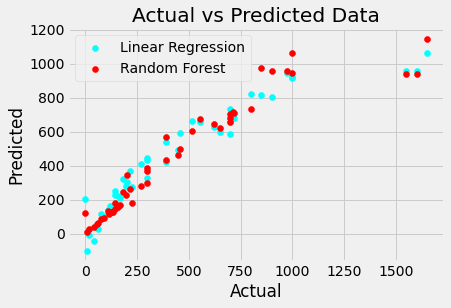


Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              205.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                    1.08e-55
Time:                        17:53:26   Log-Likelihood:                         -705.14
No. Observations:                 111   AIC:                                      1422.
Df Residuals:                     105   BIC:                                      1439.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [18]:
# Comparing linear regression with random forest regression
def perform_regression(depvar):
    train = data.loc[:,data.columns !=depvar]
    test = data.loc[:,data.columns ==depvar]
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=test_size, random_state=0)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    linear_regression_prediction = linear_regression.predict(X_test)
    print("Linear Regression:")
    print("\nCoefficients: ", linear_regression.coef_)
    print("Variance score: {}".format(linear_regression.score(X_test, y_test)))
    print("\nMean Absolute Error: ", metrics.mean_absolute_error(y_test,linear_regression_prediction) )
    print("Measn Square Error: ", metrics.mean_squared_error(y_test,linear_regression_prediction))
    print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, linear_regression_prediction)))
    lr_model_coefficient=pd.DataFrame(linear_regression.coef_[0],train.columns)
    lr_model_coefficient.columns = ['Coefficient']
    print("\n", lr_model_coefficient)
    plt.style.use('fivethirtyeight')
    plt.scatter(y_test,linear_regression_prediction, color = 'aqua')
    plt.title('Actual vs Predicted Data')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    random_forest = RandomForestRegressor()
    random_forest.fit(X_train, y_train)
    random_forest_prediction = random_forest.predict(X_test)
    print("\n\nRandom Forest:")
    print("Variance score: {}".format(random_forest.score(X_test, y_test)))
    print("\nMean Absolute Error: ", metrics.mean_absolute_error(y_test,random_forest_prediction) )
    print("Measn Square Error: ", metrics.mean_squared_error(y_test,random_forest_prediction))
    print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, random_forest_prediction)))
    plt.style.use('fivethirtyeight')
    plt.scatter(y_test,random_forest_prediction, color = 'red')
    plt.legend(labels = ('Linear Regression','Random Forest'),loc='upper left')
    plt.show()
    
    model = sm.OLS(y_train, X_train)
    ols = model.fit()
    print("\nModel Summary:")
    print(ols.summary())

perform_regression(depvar)